# Analysis of connection between Code Smells and metrics
The goal of this analysis is to understand how Code Smells and metrics and gain insight into how they could be modelled.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data import
current_dir = os.getcwd()

# construct path to the project data folder
data_dir = os.path.join(current_dir, '..', '..', 'Data','Sonar_Measures')

# load SonarQube measure data (without duplicates)
df = pd.read_csv(os.path.join(data_dir, 'sonar_measures_v1_v2_usable_vars.csv'), low_memory=False)

df

,PROJECT_ID,SQ_ANALYSIS_DATE,CLASSES,FILES,FUNCTIONS,COMMENT_LINES,COMMENT_LINES_DENSITY,COMPLEXITY,FILE_COMPLEXITY,CLASS_COMPLEXITY,...,NEW_SQALE_DEBT_RATIO,VULNERABILITIES,RELIABILITY_REMEDIATION_EFFORT,RELIABILITY_RATING,SECURITY_REMEDIATION_EFFORT,SECURITY_RATING,WONT_FIX_ISSUES,PACKAGE_DEPENDENCY_CYCLES,database,DIRECTORIES
0,accumulo,2008-07-07 14:52:05,2108.0,1103.0,17295.0,13509.0,6.2,43137.0,40.6,20.4,...,0.000000,838,7322,5,9505,4,0,0,Version1,NaN
1,accumulo,2008-07-07 12:31:47,2108.0,1103.0,17295.0,13507.0,6.2,43137.0,40.6,20.4,...,0.222222,838,7081,5,9505,4,0,0,Version1,NaN
2,accumulo,2008-07-05 18:54:27,2108.0,1103.0,17295.0,13507.0,6.2,43137.0,40.6,20.4,...,0.222222,838,7081,5,9505,4,0,0,Version1,NaN
3,accumulo,2008-07-03 20:21:40,2108.0,1103.0,17295.0,13507.0,6.2,43137.0,40.6,20.4,...,0.674560,838,7322,5,9505,4,0,0,Version1,NaN
4,accumulo,2008-07-02 00:12:36,2108.0,1103.0,17295.0,13507.0,6.2,43137.0,40.6,20.4,...,0.671668,838,7322,5,9505,4,0,0,Version1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140743,vfs,2002-08-20 06:10:50,69.0,65.0,425.0,1536.0,24.2,690.0,10.6,10.0,...,2.025316,1,0,1,30,4,0,0,Version2,14.0
140744,vfs,2002-08-20 02:57:02,69.0,65.0,422.0,1533.0,24.1,693.0,10.7,10.0,...,2.184236,1,0,1,30,4,0,0,Version2,14.0
140745,vfs,2002-07-19 11:54:15,69.0,65.0,421.0,1513.0,24.1,687.0,10.6,10.0,...,2.613333,1,0,1,30,4,0,0,Version2,14.0
140746,vfs,2002-07-18 16:47:24,69.0,65.0,421.0,1513.0,24.1,687.0,10.6,10.0,...,2.613333,1,0,1,30,4,0,0,Version2,14.0


## Choosing metrics
In the paper of Lenarduzzi et al. (2019), they attempt to model the technical debt of the dataset by code metrics. This selection already contains metrics that are useful for estimating the amount of code smells detected, such as class complexity, lines (of code) and function complexity. These metrics are selected to do analysis.

In [3]:
df.columns

Index(['PROJECT_ID', 'SQ_ANALYSIS_DATE', 'CLASSES', 'FILES', 'FUNCTIONS',
       'COMMENT_LINES', 'COMMENT_LINES_DENSITY', 'COMPLEXITY',
       'FILE_COMPLEXITY', 'CLASS_COMPLEXITY', 'FUNCTION_COMPLEXITY',
       'FUNCTION_COMPLEXITY_DISTRIBUTION', 'FILE_COMPLEXITY_DISTRIBUTION',
       'COVERAGE', 'DUPLICATED_LINES', 'DUPLICATED_BLOCKS', 'DUPLICATED_FILES',
       'DUPLICATED_LINES_DENSITY', 'VIOLATIONS', 'BLOCKER_VIOLATIONS',
       'CRITICAL_VIOLATIONS', 'INFO_VIOLATIONS', 'FALSE_POSITIVE_ISSUES',
       'CONFIRMED_ISSUES', 'LAST_COMMIT_DATE', 'CODE_SMELLS', 'BUGS',
       'EFFORT_TO_REACH_MAINTAINABILITY_RATING_A', 'AFFERENT_COUPLINGS',
       'EFFERENT_COUPLINGS', 'COGNITIVE_COMPLEXITY', 'LINES', 'NCLOC',
       'NCLOC_LANGUAGE_DISTRIBUTION', 'LINES_TO_COVER', 'LINE_COVERAGE',
       'MAJOR_VIOLATIONS', 'MINOR_VIOLATIONS', 'OPEN_ISSUES', 'SQALE_RATING',
       'NUMBER_OF_CLASSES_AND_INTERFACES', 'MISSING_PACKAGE_INFO', 'PACKAGE',
       'STATEMENTS', 'UNCOVERED_LINES', 'REOPENED_I

In [4]:
metrics = [
    "CODE_SMELLS",
    "CLASSES",
    "FILES",
    "LINES",
    "NCLOC",
    "NCLOC_LANGUAGE_DISTRIBUTION",
    "NUMBER_OF_CLASSES_AND_INTERFACES",
    "MISSING_PACKAGE_INFO",
    "PACKAGE",
    "STATEMENTS",
    "DIRECTORIES",
    "FUNCTIONS",
    "COMMENT_LINES",
    "COMMENT_LINES_DENSITY",
    "COMPLEXITY",
    "CLASS_COMPLEXITY",
    "FUNCTION_COMPLEXITY",
    "FUNCTION_COMPLEXITY_DISTRIBUTION",
    "FILE_COMPLEXITY_DISTRIBUTION",
    "COGNITIVE_COMPLEXITY",
    "PACKAGE_DEPENDENCY_CYCLES",
    "COVERAGE",
    "LINES_TO_COVER",
    "LINE_COVERAGE",
    "UNCOVERED_LINES",
    "DUPLICATED_LINES",
    "DUPLICATED_BLOCKS",
    "DUPLICATED_FILES",
    "DUPLICATED_LINES_DENSITY",
]

In [5]:
df_metrics = df[metrics]
df_metrics

,CODE_SMELLS,CLASSES,FILES,LINES,NCLOC,NCLOC_LANGUAGE_DISTRIBUTION,NUMBER_OF_CLASSES_AND_INTERFACES,MISSING_PACKAGE_INFO,PACKAGE,STATEMENTS,...,COGNITIVE_COMPLEXITY,PACKAGE_DEPENDENCY_CYCLES,COVERAGE,LINES_TO_COVER,LINE_COVERAGE,UNCOVERED_LINES,DUPLICATED_LINES,DUPLICATED_BLOCKS,DUPLICATED_FILES,DUPLICATED_LINES_DENSITY
0,17012,2108.0,1103.0,263680.0,203873.0,css=311;java=197426;js=5;web=1674;xml=4457,0,164,164,105125.0,...,39453.0,0,0.0,121105.0,0.0,121105.0,46445,2410,207,17.6
1,16987,2108.0,1103.0,262753.0,202956.0,css=311;java=197426;js=5;web=789;xml=4425,0,164,164,105125.0,...,39453.0,0,0.0,121105.0,0.0,121105.0,46301,2408,205,17.6
2,16987,2108.0,1103.0,262753.0,202956.0,css=311;java=197426;js=5;web=789;xml=4425,0,164,164,105125.0,...,39453.0,0,0.0,121105.0,0.0,121105.0,46301,2408,205,17.6
3,17013,2108.0,1103.0,263643.0,203841.0,css=311;java=197426;js=5;web=1674;xml=4425,0,164,164,105125.0,...,39453.0,0,0.0,121105.0,0.0,121105.0,46445,2410,207,17.6
4,17013,2108.0,1103.0,263639.0,203837.0,css=311;java=197426;js=5;web=1674;xml=4421,0,164,164,105125.0,...,39453.0,0,0.0,121105.0,0.0,121105.0,46445,2410,207,17.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140743,268,69.0,65.0,8859.0,4814.0,java=4814,0,14,14,1787.0,...,445.0,0,0.0,2124.0,0.0,2124.0,66,4,1,0.7
140744,269,69.0,65.0,8867.0,4835.0,java=4835,0,14,14,1794.0,...,449.0,0,0.0,2131.0,0.0,2131.0,66,4,1,0.7
140745,266,69.0,65.0,8771.0,4761.0,java=4761,0,14,14,1778.0,...,442.0,0,0.0,2104.0,0.0,2104.0,66,4,1,0.8
140746,266,69.0,65.0,8771.0,4761.0,java=4761,0,14,14,1778.0,...,442.0,0,0.0,2104.0,0.0,2104.0,66,4,1,0.8


## Investigating correlations between code smells and all numerical variables

<Figure size 3000x3000 with 0 Axes>

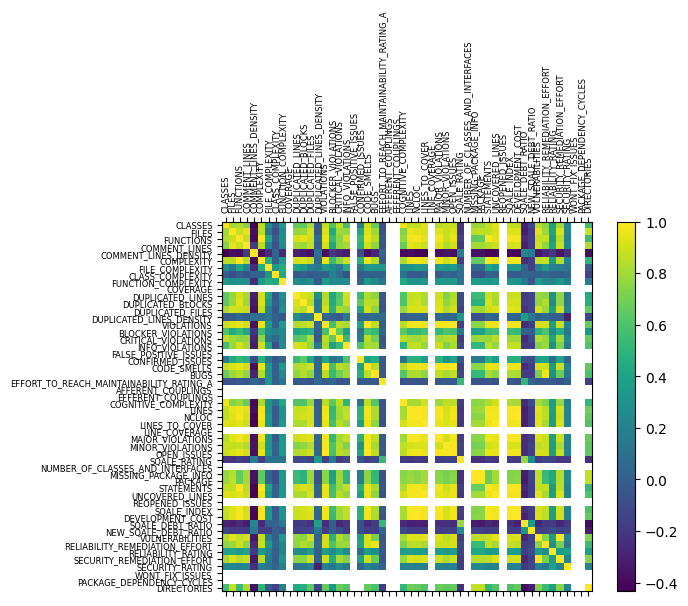

In [6]:
df_num = df.select_dtypes(include='number')

corr_matrix = df_num.corr()

plt.figure(figsize=(30,30))

fig, ax = plt.subplots() #Create figure and axes objects

im = ax.matshow(corr_matrix, cmap='viridis') #Create the matshow image

# Add colorbar (legend)
cbar = fig.colorbar(im)

# Set ticks and labels for the axes
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, fontsize=6)
ax.set_yticklabels(corr_matrix.columns, fontsize=6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

This plot is very dense. It can be seen that there are more variables for which there is no correlation possible. These variables need to be investigated as they might not be fit for modelling if they don't provide any variance.

In [7]:
df_num = df.select_dtypes(include='number')
corr_matrix = df_num.corr()
uncorrelated_cols = corr_matrix.columns[corr_matrix.isnull().all()].tolist()
print(f"Variables that can't be correlated: {uncorrelated_cols}")

Variables that can't be correlated: ['COVERAGE', 'FALSE_POSITIVE_ISSUES', 'AFFERENT_COUPLINGS', 'EFFERENT_COUPLINGS', 'LINE_COVERAGE', 'NUMBER_OF_CLASSES_AND_INTERFACES', 'REOPENED_ISSUES', 'WONT_FIX_ISSUES', 'PACKAGE_DEPENDENCY_CYCLES']


In [8]:
for col in uncorrelated_cols:
    min_val = df_num[col].min()
    max_val = df_num[col].max()
    print(f"Range {col}: {min_val - max_val}")

Range COVERAGE: 0.0
Range FALSE_POSITIVE_ISSUES: 0
Range AFFERENT_COUPLINGS: 0
Range EFFERENT_COUPLINGS: 0
Range LINE_COVERAGE: 0.0
Range NUMBER_OF_CLASSES_AND_INTERFACES: 0
Range REOPENED_ISSUES: 0
Range WONT_FIX_ISSUES: 0
Range PACKAGE_DEPENDENCY_CYCLES: 0


It can be shown that for all the variables that can't be correlated with any other variable, they have a value range of 0, which is not useful for modelling.

## Doing correlations again without variables with static values
The variables that only contain static values have been removed from the dataframe. We can now investigate the correlations between code smell and non-static metrics.

In [9]:
# data import
current_dir = os.getcwd()

# construct path to the project data folder
data_dir = os.path.join(current_dir, '..', '..', 'Data','Sonar_Measures')

# load SonarQube measure data (without duplicates)
df = pd.read_csv(os.path.join(data_dir, 'sonar_measures_v1_v2_no_statics.csv'), low_memory=False)

### 

<Figure size 3000x3000 with 0 Axes>

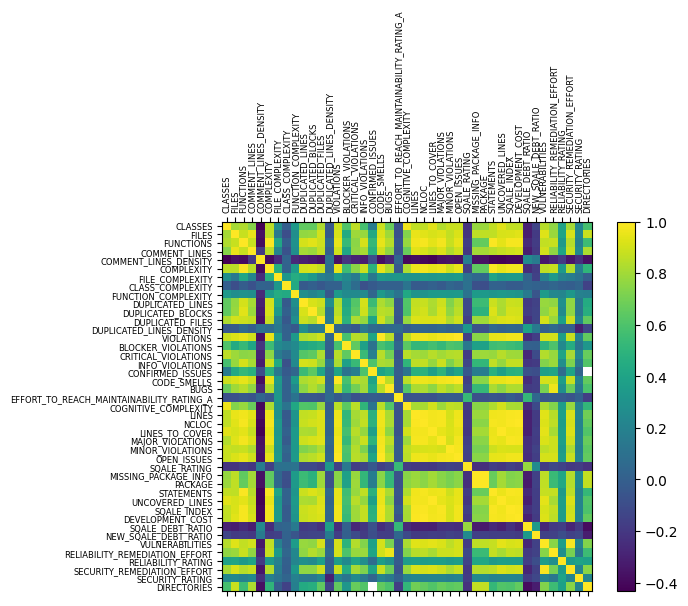

In [10]:
df_num = df.select_dtypes(include='number')

corr_matrix = df_num.corr()

plt.figure(figsize=(30,30))

fig, ax = plt.subplots() #Create figure and axes objects

im = ax.matshow(corr_matrix, cmap='viridis') #Create the matshow image

# Add colorbar (legend)
cbar = fig.colorbar(im)

# Set ticks and labels for the axes
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, fontsize=6)
ax.set_yticklabels(corr_matrix.columns, fontsize=6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

The resulting plot shows that a lot of the metrics are positively correlated to each other, resulting in a lot of green to yellow areas. Noticeably though, the squale debt ratio variables and the comment lines density have a negative correlation to almost any other variable meaning high values on metrics result in a low value for these variables and vice versa.

## Looking at the correlations of Code Smells with other (numerical) variables
Plotting a correlation matrix over all possible variables gives a broad idea about interactions between all variables in the dataset. The amount of code smells in the SonarQube analysis is given by the variable CODE_SMELLS. To understand better how this metric interacts with the others, it's worth looking at their correlations specifically.

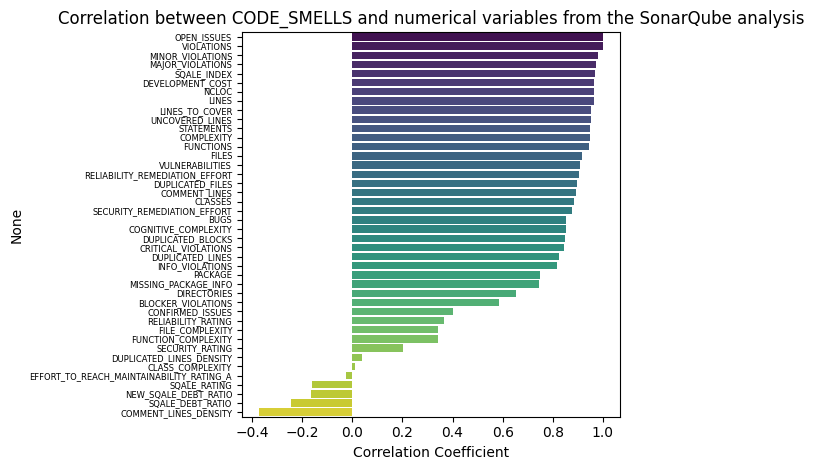

In [11]:
correlations = df_num.corr()["CODE_SMELLS"].sort_values(ascending=False)
correlations = correlations.drop("CODE_SMELLS")

plt.figure()
sns.barplot(x=correlations.values, y=correlations.index, hue=correlations.index, palette = 'viridis')
plt.title(f'Correlation between CODE_SMELLS and numerical variables from the SonarQube analysis')
plt.xlabel('Correlation Coefficient')
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

The resulting plot shows that the amount of code smells detected within a SonarQube analysis correlates highly with most of the available variables. How is it with the subset of base metrics used by Lenarduzzi et al. (2019)?

## Correlations between Code Smells and base metrics

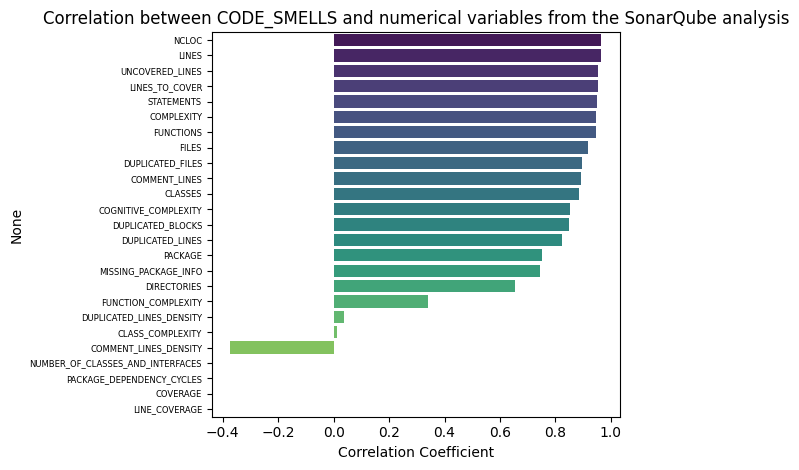

In [12]:
correlations = df_metrics.select_dtypes(include='number').corr()["CODE_SMELLS"].sort_values(ascending=False)
correlations = correlations.drop("CODE_SMELLS")

plt.figure()
sns.barplot(x=correlations.values, y=correlations.index, hue=correlations.index, palette = 'viridis')
plt.title(f'Correlation between CODE_SMELLS and numerical variables from the SonarQube analysis')
plt.xlabel('Correlation Coefficient')
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

The resulting plot shows that again code smells correlate extremely high with most of the metrics. Some metrics proposed by Lenarduzzi et al. (2019) aren't fit to be used for calculating correlations or modelling at all since they're static.